# **Clustering, Non-parametric Methods, & PCA**

# **Kieran Bissessar**

In [1]:
import pandas                 as      pd;
import numpy                  as      np;
from   sklearn.preprocessing  import  StandardScaler;
from   sklearn.decomposition  import  PCA;
import seaborn                as      sns;
import matplotlib.pyplot      as      plt;
from   scipy                  import  stats;
from   sklearn.neighbors      import  KNeighborsClassifier;
import copy;
import operator

# **Part 2 - PCA**

## Load Data

In [25]:
finalCountsDf = pd.read_csv("final_counts.csv") 
print("Rows    : ", finalCountsDf.shape[0], "\nColumns : " , finalCountsDf.shape[1])
#print("Df:\n", finalCountsDf)

Rows    :  12572 
Columns :  2701


In [3]:
dataDf = copy.deepcopy(finalCountsDf);
dataDf = dataDf.set_index('Unnamed: 0').transpose()

In [4]:
dataDf = dataDf.reset_index()
cells = dataDf['index']
del dataDf['index']
features = list(dataDf.columns)
print(dataDf)

Unnamed: 0  AL627309.1  RP11-206L10.2  LINC00115  NOC2L  KLHL17  PLEKHN1  \
0                    0              0          0      0       0        0   
1                    0              0          0      0       0        0   
2                    0              0          0      0       0        0   
3                    0              0          0      0       0        0   
4                    0              0          0      0       0        0   
...                ...            ...        ...    ...     ...      ...   
2695                 0              0          0      0       0        0   
2696                 0              0          0      0       0        0   
2697                 0              0          0      0       0        0   
2698                 0              0          0      0       0        0   
2699                 0              0          0      0       0        0   

Unnamed: 0  HES4  ISG15  AGRN  C1orf159  ...  MT-ND4L  MT-ND4  MT-ND5  MT-ND6  \
0     

## Look at the distribution of the data, and ***perform any required transformation*** before performing PCA on this data

In [5]:
dataDf_std = StandardScaler().fit_transform(dataDf);

In [6]:
#print("Original     :\n", dataDf.head());
#print("Standardized :\n", dataDf_std);

In [7]:
#print("Original Distribution");
#sns.distplot(dataDf);
#print("Standardized Distribution");
#sns.distplot(dataDf_std);

## ***Perform PCA*** on the data

In [8]:
pca  = PCA(.90);
pc   = pca.fit_transform(dataDf_std);
print("Number of Principal Components : ", pca.n_components_);

Number of Principal Components :  2024


## ***ideal number of PC’s*** for this dataset

`scikit-learn` calculated that the minimum number of principal components was 2024 such that 90% of the variance is retained.

In [9]:
pc_lst = []
for i in range(pca.n_components_):
    pc_lst.append("PC " + str(i + 1));

pcDf = pd.DataFrame(data = pc, 
                    columns = pc_lst);
#pcDfFinal = pd.concat([pcDf, cells], axis = 1);
pcDfFinal = copy.deepcopy(pcDf);
pcDfFinal['Cells']= cells
print(pcDfFinal);
pcDfFinal.to_csv('pcDF.csv')

           PC 1      PC 2       PC 3       PC 4       PC 5      PC 6  \
0     -6.785470 -0.176039   0.925761  -1.150067  -2.713780  0.987272   
1      1.071400 -1.816812   7.562352  15.035559  15.155406 -8.513299   
2     -3.863878 -0.817270  10.686087   2.478880  -6.135915 -0.308374   
3     16.366778 -0.992806  -4.127099   0.269114  -0.218231  1.312465   
4      2.035003  0.442230   5.854251 -16.051600   4.285675 -2.846674   
...         ...       ...        ...        ...        ...       ...   
2695  19.125932 -3.038376  -3.251857   1.411120  -0.598105  3.714289   
2696   2.242907 -0.304745  15.050979   8.616790  12.116949  2.524896   
2697  -5.975315 -0.080446  -8.375113   2.801084  10.377567 -2.942410   
2698  -2.109071  0.672817  -8.582751  -1.814932   9.901049 -3.406634   
2699  -7.628091  0.144471  -2.190214   1.905618  -2.620740  0.236831   

          PC 7      PC 8       PC 9     PC 10  ...   PC 2016   PC 2017  \
0     0.619505  0.494906   0.671450  0.721782  ... -1.340902 

## ***scree plot*** to determine the contribution of different PC’s

In [10]:
screeDict = {"Variance"             : pca.explained_variance_ratio_,
             "Principal Components" : pc_lst}
screeDf   = pd.DataFrame.from_dict(screeDict);
print(screeDf);

      Variance Principal Components
0     0.008767                 PC 1
1     0.004276                 PC 2
2     0.003865                 PC 3
3     0.002848                 PC 4
4     0.002389                 PC 5
...        ...                  ...
2019  0.000202              PC 2020
2020  0.000202              PC 2021
2021  0.000202              PC 2022
2022  0.000202              PC 2023
2023  0.000201              PC 2024

[2024 rows x 2 columns]


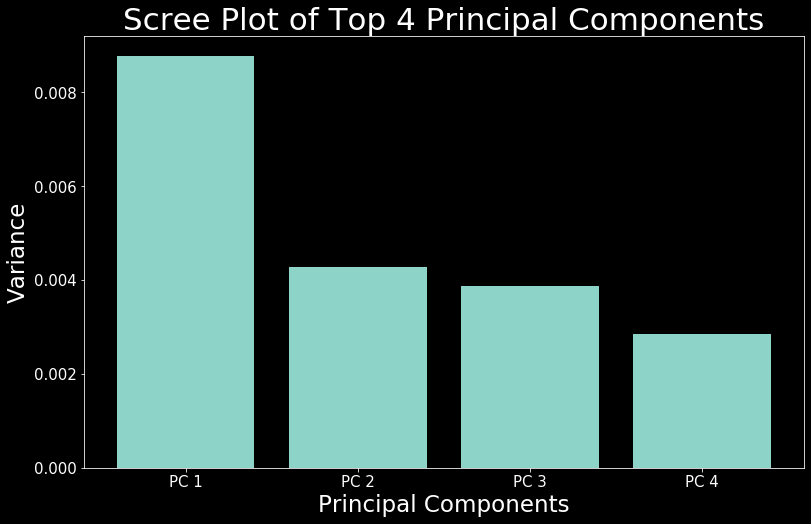

In [11]:
plt.style.use('dark_background');
fig = plt.figure(figsize = [10,6]);
ax = fig.add_axes([0,0,1,1]);
pcs = screeDf.iloc[ :4 , 1 ];
var = screeDf.iloc[ :4 , 0 ];
ax.bar(pcs , var);
ax.set_xlabel('Principal Components', size = 23);
plt.xticks(size = 15);
plt.yticks(size = 15);
ax.set_ylabel('Variance', size = 23);
ax.set_title("Scree Plot of Top 4 Principal Components", size = 31);
plt.show();

## ***scatter plot of PC1 vs PC2*** 

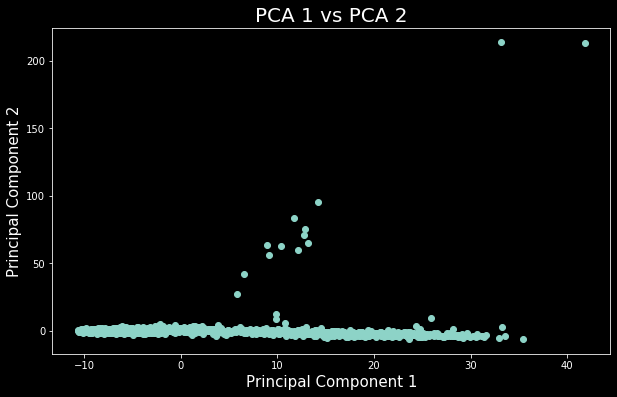

In [12]:
fig = plt.figure(figsize = [10,6])
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA 1 vs PCA 2', fontsize = 20)
plt.scatter(pcDfFinal['PC 1'],pcDfFinal['PC 2'])
plt.show();

After plotting PC 1 and PC 2, there seems to be only one main cluster. There are a few outliers. The cluster seems to hug PC 1's axis. Perhaps this is because PC 1 (x axis) has twice as much prevalence than the second component.

## Determine the ***top contributing features for top 5 PC’S***

In [13]:
contrFeatsDf  = pd.DataFrame(pca.components_, columns = features, index = pc_lst)
contr5FeatsDf = copy.deepcopy(contrFeatsDf.iloc[ :5 , : ])
contr5FeatsDf

,AL627309.1,RP11-206L10.2,LINC00115,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,AGRN,C1orf159,...,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2.1,SRSF10.1
PC 1,0.004949,0.000421,0.002284,0.001393,0.002733,0.000101,0.039583,0.030205,0.005228,-0.001285,...,0.001010,-0.010336,0.001448,0.003793,-0.007071,0.004749,-0.002990,0.004628,-0.000411,-0.001753
PC 2,-0.001817,-0.000901,-0.001111,-0.002860,0.025542,-0.000322,-0.003992,-0.008701,-0.001595,-0.001140,...,-0.001439,-0.002512,-0.000762,-0.003867,0.001064,0.004752,-0.002599,-0.001938,-0.002706,-0.002048
PC 3,-0.003033,-0.002018,0.003180,0.012311,0.003179,0.001479,0.011010,0.002351,-0.005006,0.002204,...,0.004411,-0.005735,-0.000977,0.014482,-0.010087,-0.001388,0.004987,0.002411,0.011546,0.009034
PC 4,-0.000391,0.010573,-0.000618,0.006563,0.003189,-0.003844,0.016588,-0.002784,-0.000621,0.006271,...,0.001947,-0.006414,-0.004126,0.007752,-0.010256,0.003954,0.006951,0.007532,0.010413,0.011783
PC 5,-0.003882,0.015825,0.001208,-0.000038,-0.002444,-0.003259,-0.014541,-0.008765,0.003113,-0.001522,...,-0.002771,0.005347,-0.003291,-0.003779,-0.003927,-0.000527,0.004430,0.002335,-0.003334,0.001723


In [14]:
col_correlation_dict = {};
for col in contr5FeatsDf.columns:
    col_correlation_dict[col] = contr5FeatsDf[col].abs().sum()
sortedcol_corr = sorted(col_correlation_dict.items(), key = operator.itemgetter(1), reverse = True)

important_features_lst = []
count = 0
for i in sortedcol_corr:
    if count < 5:
        important_features_lst.append(str(i[0]));
        count += 1
    else:
        break
important_features_lst

['CD74', 'HLA-DRA', 'HLA-DRB1', 'NKG7', 'HLA-DPB1']

The top five features for the top five PCs are 
1. CD74
2. HLA-DRA
3. HLA-DRB1
4. NKG7
5. HLA-DPB1

## **how many clusters** exist in the data, based on the ***pairwise plot of top 5 PC’s*** 

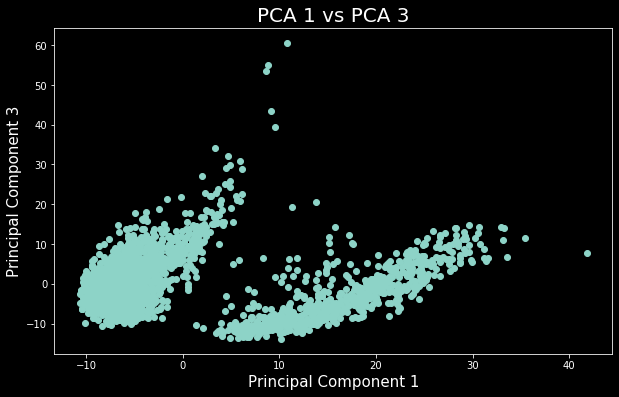

In [15]:
fig = plt.figure(figsize = [10,6])
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('PCA 1 vs PCA 3', fontsize = 20)
plt.scatter(pcDfFinal['PC 1'],pcDfFinal['PC 3'])
plt.show();

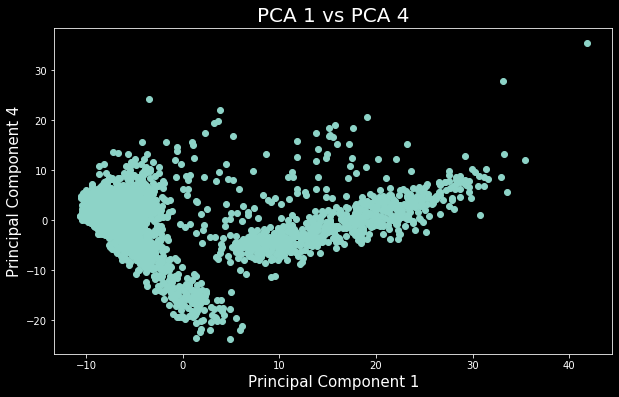

In [16]:
fig = plt.figure(figsize = [10,6])
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 4', fontsize = 15)
ax.set_title('PCA 1 vs PCA 4', fontsize = 20)
plt.scatter(pcDfFinal['PC 1'],pcDfFinal['PC 4'])
plt.show();

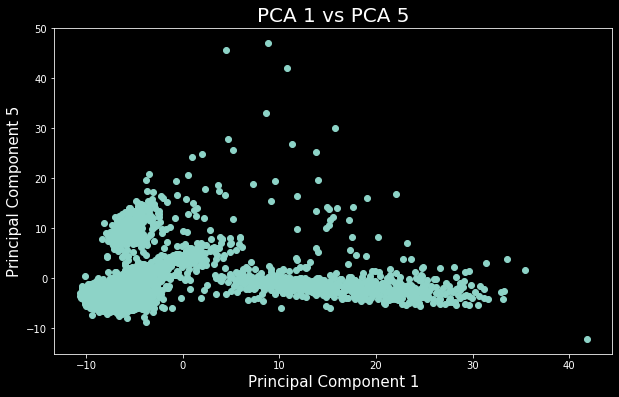

In [17]:
fig = plt.figure(figsize = [10,6])
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 5', fontsize = 15)
ax.set_title('PCA 1 vs PCA 5', fontsize = 20)
plt.scatter(pcDfFinal['PC 1'],pcDfFinal['PC 5'])
plt.show();

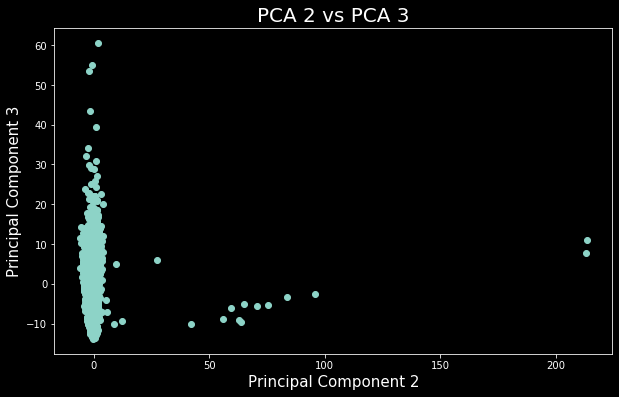

In [18]:
fig = plt.figure(figsize = [10,6])
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('PCA 2 vs PCA 3', fontsize = 20)
plt.scatter(pcDfFinal['PC 2'],pcDfFinal['PC 3'])
plt.show();

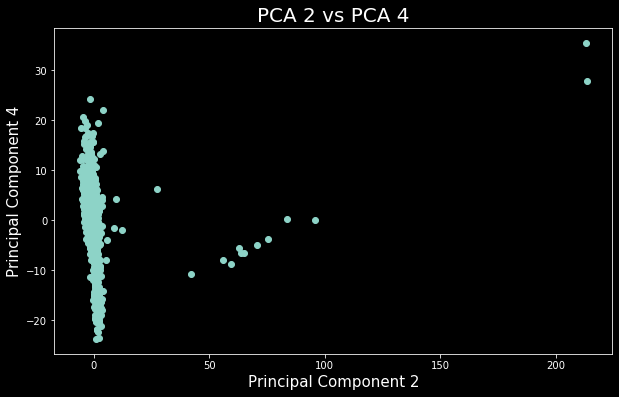

In [19]:
fig = plt.figure(figsize = [10,6])
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 4', fontsize = 15)
ax.set_title('PCA 2 vs PCA 4', fontsize = 20)
plt.scatter(pcDfFinal['PC 2'],pcDfFinal['PC 4'])
plt.show();

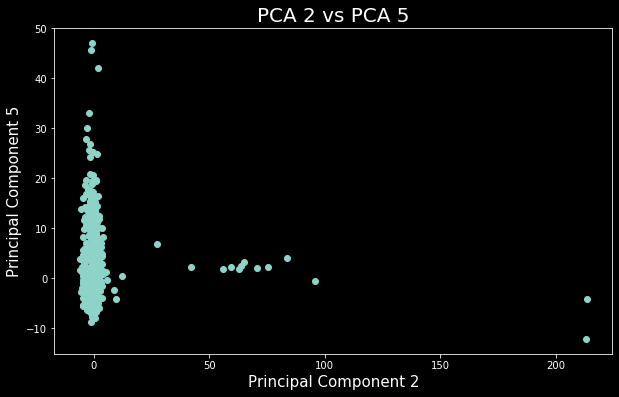

In [20]:
fig = plt.figure(figsize = [10,6])
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 5', fontsize = 15)
ax.set_title('PCA 2 vs PCA 5', fontsize = 20)
plt.scatter(pcDfFinal['PC 2'],pcDfFinal['PC 5'])
plt.show();

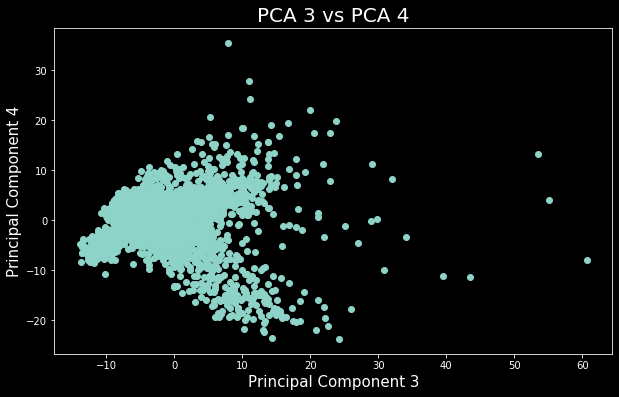

In [21]:
fig = plt.figure(figsize = [10,6])
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 15)
ax.set_ylabel('Principal Component 4', fontsize = 15)
ax.set_title('PCA 3 vs PCA 4', fontsize = 20)
plt.scatter(pcDfFinal['PC 3'],pcDfFinal['PC 4'])
plt.show();

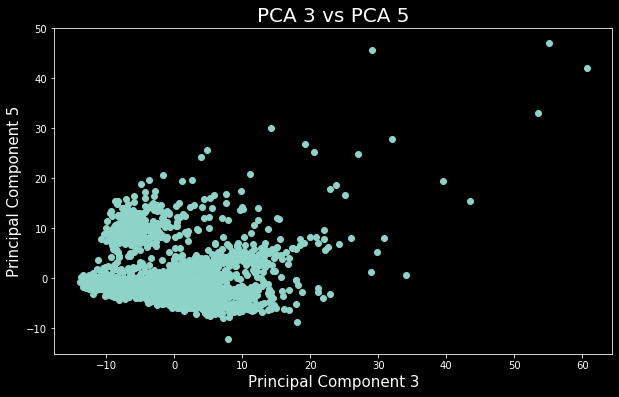

In [22]:
fig = plt.figure(figsize = [10,6])
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 3', fontsize = 15)
ax.set_ylabel('Principal Component 5', fontsize = 15)
ax.set_title('PCA 3 vs PCA 5', fontsize = 20)
plt.scatter(pcDfFinal['PC 3'],pcDfFinal['PC 5'])
plt.show();

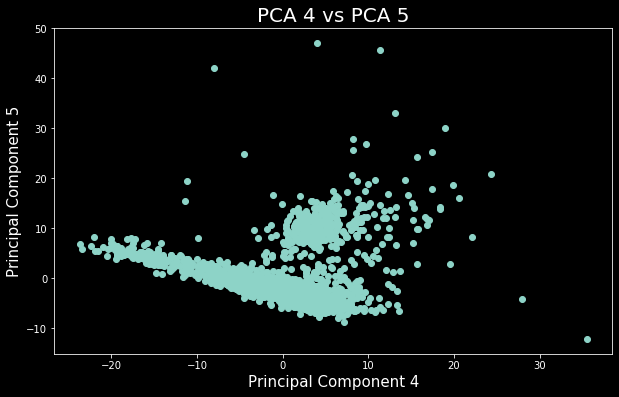

In [23]:
fig = plt.figure(figsize = [10,6])
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 4', fontsize = 15)
ax.set_ylabel('Principal Component 5', fontsize = 15)
ax.set_title('PCA 4 vs PCA 5', fontsize = 20)
plt.scatter(pcDfFinal['PC 4'],pcDfFinal['PC 5'])
plt.show();

Based on the pairwise plot of hte top 5 principal components, there seems to be a few clusters. Depending on which comparison, 1 to 3 clusters can be observed. I would hypothesize that three clusters actually exist.

## ***Perform a KNN with top 5 PC’S***

In [24]:
knn = KNeighborsClassifier(n_neighbors = 5);
knn.fit(pc, ids);

NameError: name 'ids' is not defined